In [2]:
# @itsvenu_
# KMeansClustering

# random initialization trap (K-Means++)
# determine number of K - within cluster sum of squares (WCSS)
# minimize WCSS to choose optimal number of K using Elbow chart/method

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dat = pd.read_csv('../../data/Mall_Customers.csv')
dat.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dat.shape

(200, 5)

In [4]:
X = dat.iloc[:, 3:].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Text(0, 0.5, 'Spending Score')

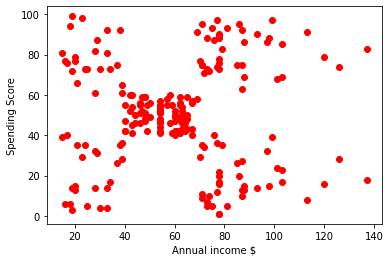

In [6]:
plt.scatter(X[:, 0], X[:, 1], color = 'red')
plt.xlabel('Annual income $')
plt.ylabel('Spending Score')

In [26]:
# elbow method with WCSS

wcss = []
for i in range(1, 11):
    i_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    i_kmeans.fit(X)
    wcss.append(i_kmeans.inertia_)

In [27]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.83934915659,
 21850.165282585633,
 19672.07284901432]

Text(0, 0.5, 'WCSS')

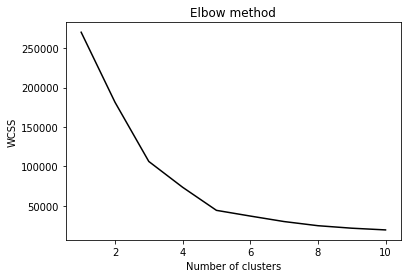

In [28]:
plt.plot(range(1, 11), wcss, color='black')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [32]:
# choose 5 clusters
# assign each observation to a cluster

kmModel = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y_km_pred = kmModel.fit_predict(X)

Text(0, 0.5, 'Spending score')

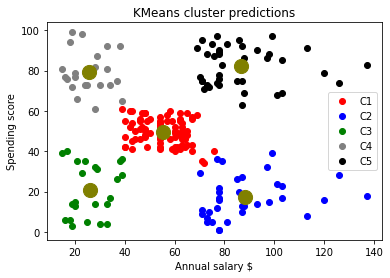

In [39]:
# visualize the results

plt.scatter(X[Y_km_pred==0, 0], X[Y_km_pred==0, 1], color='red', label='C1')
plt.scatter(X[Y_km_pred==1, 0], X[Y_km_pred==1, 1], color='blue', label='C2')
plt.scatter(X[Y_km_pred==2, 0], X[Y_km_pred==2, 1], color='green', label='C3')
plt.scatter(X[Y_km_pred==3, 0], X[Y_km_pred==3, 1], color='gray', label='C4')
plt.scatter(X[Y_km_pred==4, 0], X[Y_km_pred==4, 1], color='black', label='C5')

# add centroids
plt.scatter(kmModel.cluster_centers_[:, 0], kmModel.cluster_centers_[:, 1], s=200, color='olive')
plt.legend()

# labels
plt.title('KMeans cluster predictions')
plt.xlabel('Annual salary $')
plt.ylabel('Spending score')